# 1985 Automobile Dataset #

This dataset is availble in from the UCI Machine Learing Repository (that's right, the big university down the street from us has a famous repository of machine learning datasets... not exactly Kaggle, but probably a better variety of "serious" datasets). It was originally uploaded by Jeffrey Schlimmer using the *1985 Ward's Automotive Yearbook*.

We are going to use the dataset to predict the `make` of an automobile based on features like number of cylinders, body style, and the length of the vehicle. Use a Random Forest model. Running the algorithm will be easy. The majority of this assignment is one of Feature Engineering.

### 1985 ###

Before starting this ML problem, let's take a walk down 1985's memory lane: Michael Jackson, Da Bears Superbowl Champs, Yours Truly, Jackie Joyner-Kersee, 1980's fashion, a video game legend, Madonna, the one and only Michael Jordan, and the iconic National Geographic girl.

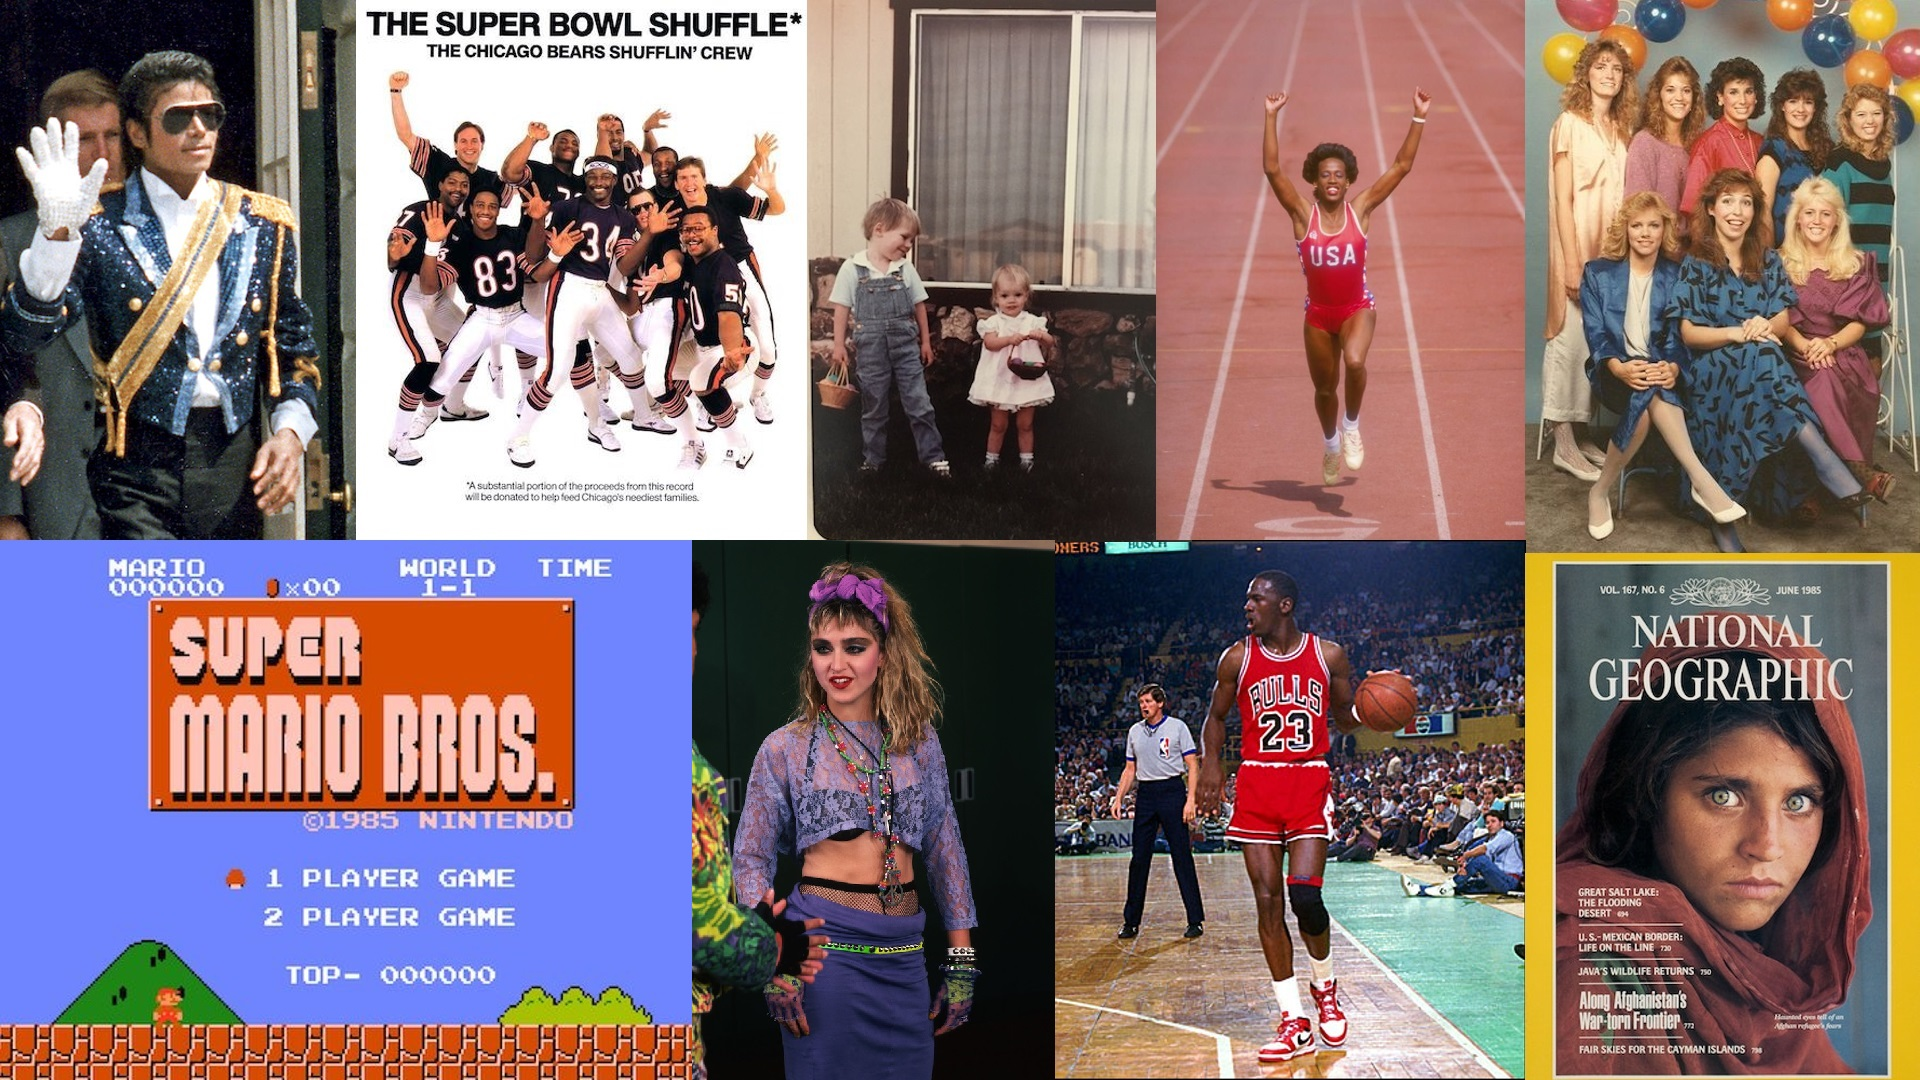

### References: ###
* [UCI Machine Learning Repository - Automobiles](https://archive.ics.uci.edu/ml/datasets/automobile)
<!-- * Chris Moffitt wrote an article for *Practical Business Python* called [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) that gave me the idea of having all-ya-all tackle this as a class exercise. Chris explains a number of techniques to encode the data and I hope that our class solves most of them without consulting Moffitt's article. -->
* [A Data Scientist’s Toolkit to Encode Categorical Variables to Numeric by Dr. Dataman](https://towardsdatascience.com/a-data-scientists-toolkit-to-encode-categorical-variables-to-numeric-d17ad9fae03f) balances theory and practice.
* [Stop Using Pandas get_dummies() for Feature Encoding by Satyam Kumar](https://towardsdatascience.com/stop-using-pandas-get-dummies-for-feature-encoding-5d2cd07cb4fc) shows us how to use SKLearn's One Hot Encoder correctly.
* [Beware of the Dummy Variable Trap in Pandas by Parul Pandey](https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde) explains a problem that can occur when using `get_dummies` and `OneHotEncoder`.

### Features Description: ###
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

column_headings = [ "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", 
    "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", 
    "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower",
    "peak-rpm", "city-mpg", "highway-mpg", "price" ]

df = pd.read_csv("usa_auto_imports_1985.csv", header=None, names=column_headings, na_values="?")
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [11]:
df.isnull().sum(axis=1).sort_values(ascending=False)[:15]

130    3
131    3
55     2
63     2
9      2
58     2
57     2
56     2
129    2
44     2
45     2
46     1
1      1
181    1
73     1
dtype: int64

In [12]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Domain Knowledge ###

This dataset was primarily created for purposes of determining car insurance. Two of the first fields are related to insurance and therefore we are not going to consider them: `normalized-losses` and `symboling`

In [13]:
df.drop(columns=["normalized-losses", "symboling"], inplace=True)
df.isnull().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
27,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
44,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,...,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
55,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,...,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0
63,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
129,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,...,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


## Feature Engineering ##

I leave you to these features. You'll need to handle a few missing values. What would be the most statistically sound way to deal with them? You'll need to convert quite a few categorical features to numerical data. Any irrelevant features should be removed. Some features are harder than others.

* Aspiration
* Body Style
* Drive Wheels
* Engine Location
* Engine Type
* Fuel System
* Fuel Type
* Number of Cylinders
* Number of Doors

I recommend that you read [Satyam Kumar's article about One Hot Encoders](https://towardsdatascience.com/stop-using-pandas-get-dummies-for-feature-encoding-5d2cd07cb4fc)

In [15]:
df["num-of-doors"].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

## Split, Train, Scale, and Fit ##

There are a few auotmobile `make` samples that are very rare and should probably be dropped or combined. We choose to combine them but dropping would probably have been better for model performance.

In [16]:
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [17]:
common_makes = [ "toyota", "nissan", "mazda", "mitsubishi", "honda",
                 "volkswagen", "subaru", "peugot", "volvo", "dodge",
                 "mercedes-benz", "bmw", "audi", "plymouth", "saab", "porsche"]
#                 "porsche", "isuzu", "jaguar", "chevrolet", "alfa-romero" ]

df.loc[~df["make"].isin(common_makes), "make"] = "other"
df["make"].value_counts()

toyota           32
nissan           18
mazda            17
other            16
honda            13
mitsubishi       13
subaru           12
volkswagen       12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
Name: make, dtype: int64

In [19]:
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,other,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,other,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,other,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Choose our features and classes
X = df.loc[:, df.columns != 'make']
y = df["make"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
print(f"Training: {X_train.shape}")
print(f"Testing:  {X_test.shape}")

# Train the scaler on the TRAINING DATA ONLY
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=X.columns)
print("Training data scaled")

# Apply the TRAINING DATA scalar to the test data
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
print("Test data scaled according to training rules")

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
dtree_y_pred = dtree.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rfor = RandomForestClassifier(random_state=0)
rfor.fit(X_train, y_train)
rfor_y_pred = rfor.predict(X_test)

### Metric Reminders ###

Three important metrics help us understand the performance of classification models:
* Accuracy: How many did you get right total?
* Precision: Of all you guessed to be positive, how many were real positive cases?
* Recall: Of all the real positive cases, how many did you get correct?
* F1 Score: A combination of Precision and Recall. A high F1 means both Precision and Recall are high but a low F1 score means that either one could be low (or both)

$$
\begin{aligned}
accuracy &= \frac{tp + tn}{total} \\ \\
precision &= \frac{tp}{tp + fp} \\ \\
recall &= \frac{tp}{tp + fn} \\
\end{aligned}
$$

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, knn_y_pred, zero_division=1))
print()
print(classification_report(y_test, dtree_y_pred, zero_division=1))
print()
print(classification_report(y_test, rfor_y_pred, zero_division=1))
print()

In [ ]:
scores = pd.DataFrame(data=zip(rfor_y_pred, y_test), columns=["Predicted", "Actual"])
scores["Result"] = scores["Predicted"] == scores["Actual"]
scores

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

labels = [cls for cls in rfor.classes_ if cls in rfor_y_pred]
matrix = confusion_matrix(y_test, rfor_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)
plt.draw()

In [ ]:
pd.DataFrame(
    zip(X_train.columns, abs(rfor.feature_importances_)),
    columns=["feature", "coefficient"],
).sort_values("coefficient").reset_index(drop=True)

## Mushroom Dataset ##

The mushroom dataset contains information describing more than 8000 samples of mushrooms. The 

I retrieved this dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/mushroom), which was originally based on information Jeffrey Schlimmer uploaded from the *The Audubon Society Field Guide to North American Mushrooms* (1981). It appears that the data is based on real mushrooms from the Agaricus and Lepiota Family (pp. 500-525) but that some (all?) of the samples were generated rather than collected in the field. The UCI repository describes the dataset in this way:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

Each mushroom in this dataset is classified as either (E)dible or (P)oisonous. Some of the poisonous mushrooms will kill you. Others are likely to just make you sick. All of these bad mushrooms are labeled as poisoness.

### Assignment ###

Your job is to create a ML model that will predict whether an arbitrary mushroom is safe to eat. You have 8094 mushrooms to train and test with. I will use your model to predict 30 mushrooms that have been omitted from your data. Here are some suggestions:

1. Read the mushroom data
2. Handle missing or erroneous data
3. Convert categorical features to numerical data
4. Scale features as necessary
5. Build and test a model
6. Repeat if your model has poor performance

You are free to use either a KNN model or Random Forests. If you are looking for a challenge, research Logitic Regression (*not* Linear Regression... but *Logistic Regression*) and see how it performs.

In [ ]:
import pandas as pd
df = pd.read_csv("mushrooms.csv")
df